In [18]:
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [69]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=(1,)))
model.add(keras.layers.Dense(3, activation='tanh'))
model.add(keras.layers.Dense(1, activation='linear'))

In [70]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 3)                 6         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 4         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


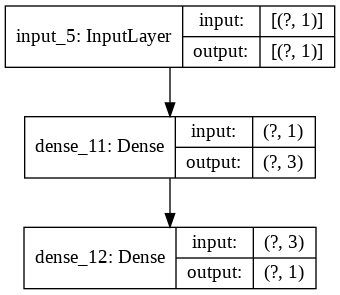

In [71]:
keras.utils.plot_model(model, show_shapes=True)

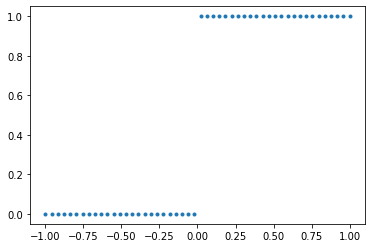

In [72]:
x = np.linspace(-1, 1, 50)

# Modulo
# t = np.abs(x)

# Heavyside
t = np.where(x > 0, 1, 0)

plt.plot(x, t, '.')

In [91]:
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [92]:
model.fit(x, t, epochs=250)

Epoch 1/250
2/2 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 2/250
2/2 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 3/250
2/2 [==============================] - 0s 824us/step - loss: 0.0134
Epoch 4/250
2/2 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 5/250
2/2 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 6/250
2/2 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 7/250
2/2 [==============================] - 0s 1ms/step - loss: 0.0134
Epoch 8/250
2/2 [==============================] - 0s 2ms/step - loss: 0.0134
Epoch 9/250
2/2 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 10/250
2/2 [==============================] - 0s 1ms/step - loss: 0.0136
Epoch 11/250
2/2 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 12/250
2/2 [==============================] - 0s 2ms/step - loss: 0.0137
Epoch 13/250
2/2 [==============================] - 0s 847u

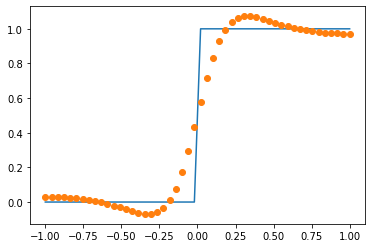

In [93]:
y = model.predict(x)
plt.plot(x, t)
plt.plot(x, y, 'o')

In [129]:
w1, w0 = model.layers[0].get_weights()
w2, z0 = model.layers[1].get_weights()

In [134]:
print(w1.shape, w0.shape)
print(w1, w0)

(1, 3) (3,)
[[-0.27982864  4.8596115   1.9908255 ]] [-0.11655878  0.00246416  0.00493133]


In [130]:
yy = []
for i in range(len(w1[0])):
  yy.append(np.tanh(w1[0][i] * x + w0[i]))

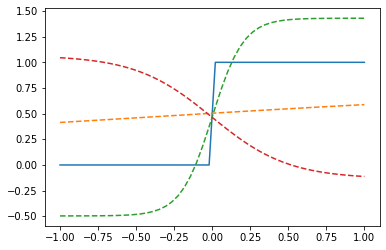

In [133]:
plt.plot(x, t)
for i, yi in enumerate(yy):
  plt.plot(x, yi * w2[i] + z0, '--')